Scenario Description:
In the hypothetical study we're considering, the relationship between stress, smoking, and heart disease is examined. This scenario is a classic example to illustrate the concept of collider bias in statistical analysis and causal inference.

Collider Bias Explained:
Collider bias occurs when an analyst controls for a variable that is influenced by at least two other variables in a study. This variable, often called a collider, can introduce spurious associations between the other variables if it is conditioned upon (i.e., controlled for or adjusted in the analysis).

Application to the Hypothetical Study:
In this case, suppose smoking is influenced by stress (people might smoke more when they are stressed) and independently affects the risk of developing heart disease. Here, smoking acts as a collider in the relationship between stress and heart disease.

Direct Relationships:
Stress and Smoking: Higher stress levels may lead to an increase in smoking as a coping mechanism.
Smoking and Heart Disease: Smoking is a known risk factor for heart disease.
Collider Bias when Controlling for Smoking:
When you control for smoking, you might inadvertently isolate a subset of the population where the correlation between stress and heart disease appears stronger or weaker than it actually is. For example, among non-smokers, the relationship between stress and heart disease might be more direct and apparent, while among smokers, the detrimental effects of smoking might overshadow any direct effect of stress on heart disease.
This results in a misleading interpretation that stress is more (or less) influential on heart disease than it truly is, depending on the group being analyzed.
Identification and Mitigation of Collider Bias:

Identification:
Use directed acyclic graphs (DAGs) to visualize and understand the relationships and pathways among variables.
Analyze the changes in correlation when the collider is and isn’t controlled for.
Mitigation:
Avoid controlling for the collider unless it is necessary for understanding specific pathways.
Use stratification methods to analyze the impact separately within different groups (e.g., smokers vs. non-smokers).
Employ advanced statistical techniques such as instrumental variables or Mendelian randomization, which can help in distinguishing between correlation and causation without falling into the trap of collider bias.

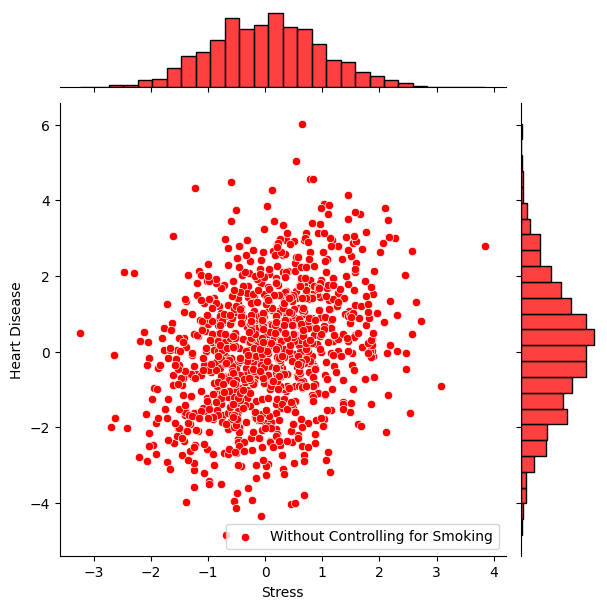

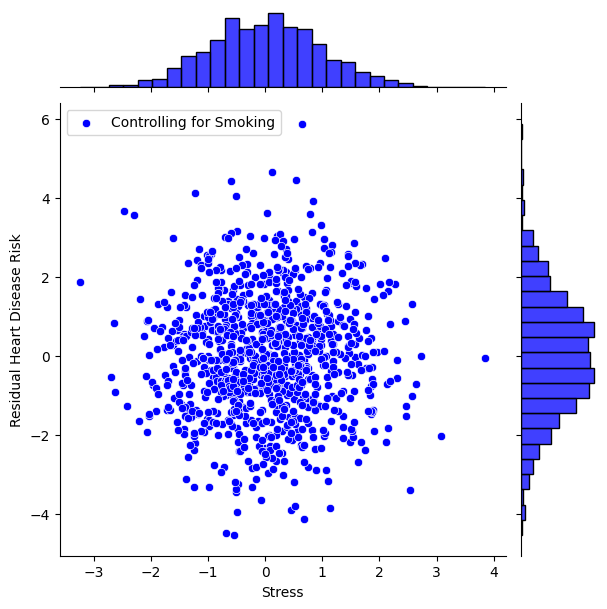

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n = 1000  # Number of individuals
stress = np.random.normal(loc=0, scale=1, size=n)  # Stress levels normally distributed
smoking = stress + np.random.normal(loc=0, scale=1, size=n)  # Smoking depends on stress
heart_disease = 0.5 * smoking + np.random.normal(loc=0, scale=1.5, size=n)  # Heart disease risk

# Plotting
sns.jointplot(x=stress, y=heart_disease, kind='scatter', color='r', label='Without Controlling for Smoking')
plt.legend()
plt.xlabel('Stress')
plt.ylabel('Heart Disease')
plt.show()

# Controlling for smoking
from scipy.stats import linregress
residuals = heart_disease - linregress(smoking, heart_disease).intercept - linregress(smoking, heart_disease).slope * smoking

sns.jointplot(x=stress, y=residuals, kind='scatter', color='b', label='Controlling for Smoking')
plt.legend()
plt.xlabel('Stress')
plt.ylabel('Residual Heart Disease Risk')
plt.show()


Identification of Collider Bias
Visualization with Directed Acyclic Graphs (DAGs):
Using a DAG can help visually identify whether controlling for a variable introduces bias. In our case, the DAG would show arrows from stress to smoking and from smoking to heart disease, indicating that smoking is a collider.
Checking the Impact of Controlling for the Collider:
We can compare the association between stress and heart disease before and after controlling for smoking to see if there's a significant change in the relationship, which might suggest collider bias.

In [2]:
import statsmodels.api as sm

# Without controlling for smoking
model1 = sm.OLS(heart_disease, sm.add_constant(stress)).fit()
print("Without controlling for smoking:\n", model1.summary())

# Controlling for smoking
model2 = sm.OLS(heart_disease, sm.add_constant(np.column_stack([stress, smoking]))).fit()
print("Controlling for smoking:\n", model2.summary())

Without controlling for smoking:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     104.5
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           2.16e-23
Time:                        15:37:24   Log-Likelihood:                -1857.9
No. Observations:                1000   AIC:                             3720.
Df Residuals:                     998   BIC:                             3730.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0

Mitigation of Collider Bias
Stratification:
Analyze the impact of stress on heart disease within different levels of the collider (smoking). This helps to see if the effects of stress vary significantly across different smoking statuses without directly adjusting for smoking as a covariate.
Alternative Analytical Methods:
Instrumental Variables (IV): If there's an external variable that affects smoking but not directly linked to heart disease or stress, it can be used as an IV to handle the bias.
Mendelian Randomization: If genetic data is available, using genetic variants associated with smoking (but not with stress directly) can help in analyzing the causal effect of smoking.

In [3]:
# Stratify the data by smoking levels (e.g., high and low based on median)
high_smoking = smoking > np.median(smoking)
low_smoking = smoking <= np.median(smoking)

# Model stress and heart disease in high smoking group
model_high = sm.OLS(heart_disease[high_smoking], sm.add_constant(stress[high_smoking])).fit()
print("High smoking group:\n", model_high.summary())

# Model stress and heart disease in low smoking group
model_low = sm.OLS(heart_disease[low_smoking], sm.add_constant(stress[low_smoking])).fit()
print("Low smoking group:\n", model_low.summary())

High smoking group:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     14.96
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           0.000125
Time:                        15:37:56   Log-Likelihood:                -931.93
No. Observations:                 500   AIC:                             1868.
Df Residuals:                     498   BIC:                             1876.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4336      0.08

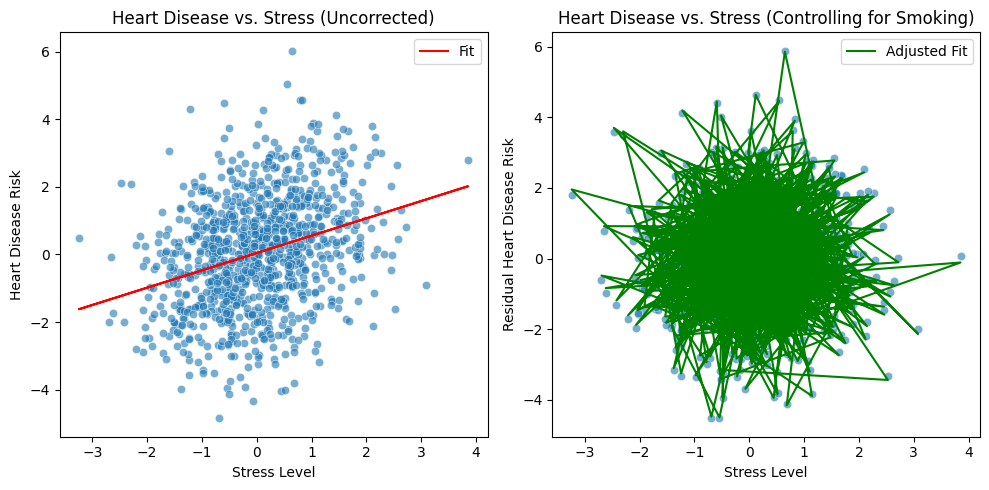

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n = 1000  # Number of individuals
stress = np.random.normal(loc=0, scale=1, size=n)  # Stress levels normally distributed
smoking = stress + np.random.normal(loc=0, scale=1, size=n)  # Smoking depends on stress
heart_disease = 0.5 * smoking + np.random.normal(loc=0, scale=1.5, size=n)  # Heart disease risk

# Simple scatter plot without controlling for smoking
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=stress, y=heart_disease, alpha=0.6)
plt.title('Heart Disease vs. Stress (Uncorrected)')
plt.xlabel('Stress Level')
plt.ylabel('Heart Disease Risk')

# Fitting a linear regression model without controlling for smoking
model1 = sm.OLS(heart_disease, sm.add_constant(stress)).fit()
predicted_values = model1.predict(sm.add_constant(stress))
plt.plot(stress, predicted_values, color='red', label='Fit')
plt.legend()

# Scatter plot controlling for smoking
plt.subplot(1, 2, 2)
residuals = heart_disease - (smoking * model2.params[2] + model2.params[0])
sns.scatterplot(x=stress, y=residuals, alpha=0.6)
plt.title('Heart Disease vs. Stress (Controlling for Smoking)')
plt.xlabel('Stress Level')
plt.ylabel('Residual Heart Disease Risk')

# Fitting a linear regression model controlling for smoking
model2 = sm.OLS(heart_disease, sm.add_constant(np.column_stack([stress, smoking]))).fit()
predicted_values_controlled = model2.predict(sm.add_constant(np.column_stack([stress, smoking])))
adjusted_residuals = heart_disease - predicted_values_controlled
plt.plot(stress, adjusted_residuals, color='green', label='Adjusted Fit')
plt.legend()

plt.tight_layout()
plt.show()
